<a href="https://colab.research.google.com/github/dbazan96/CompetitionRainfall/blob/main/Competition%20-%20Predict%20Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Rainfall competition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

url1 = "https://raw.githubusercontent.com/dbazan96/CompetitionRainfall/refs/heads/main/train.csv"
url2 = "https://raw.githubusercontent.com/dbazan96/CompetitionRainfall/refs/heads/main/test.csv"

train = pd.read_csv(url1)
test = pd.read_csv(url2)

In [2]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [3]:
train.dtypes

,0
id,int64
day,int64
pressure,float64
maxtemp,float64
temparature,float64
mintemp,float64
dewpoint,float64
humidity,float64
cloud,float64
sunshine,float64


In [4]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [5]:
train.isnull().sum()

,0
id,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0


In [6]:
duplicated_rows = train[train.duplicated()]

In [7]:
float_dtypes = train.select_dtypes(include=["float64"])


for column in float_dtypes.columns:
    fig = px.box(train, y=column)
    fig.show()

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-8-9b927e453acd>:7: UserWarning:

Ignoring `palette` because no `hue` variable has

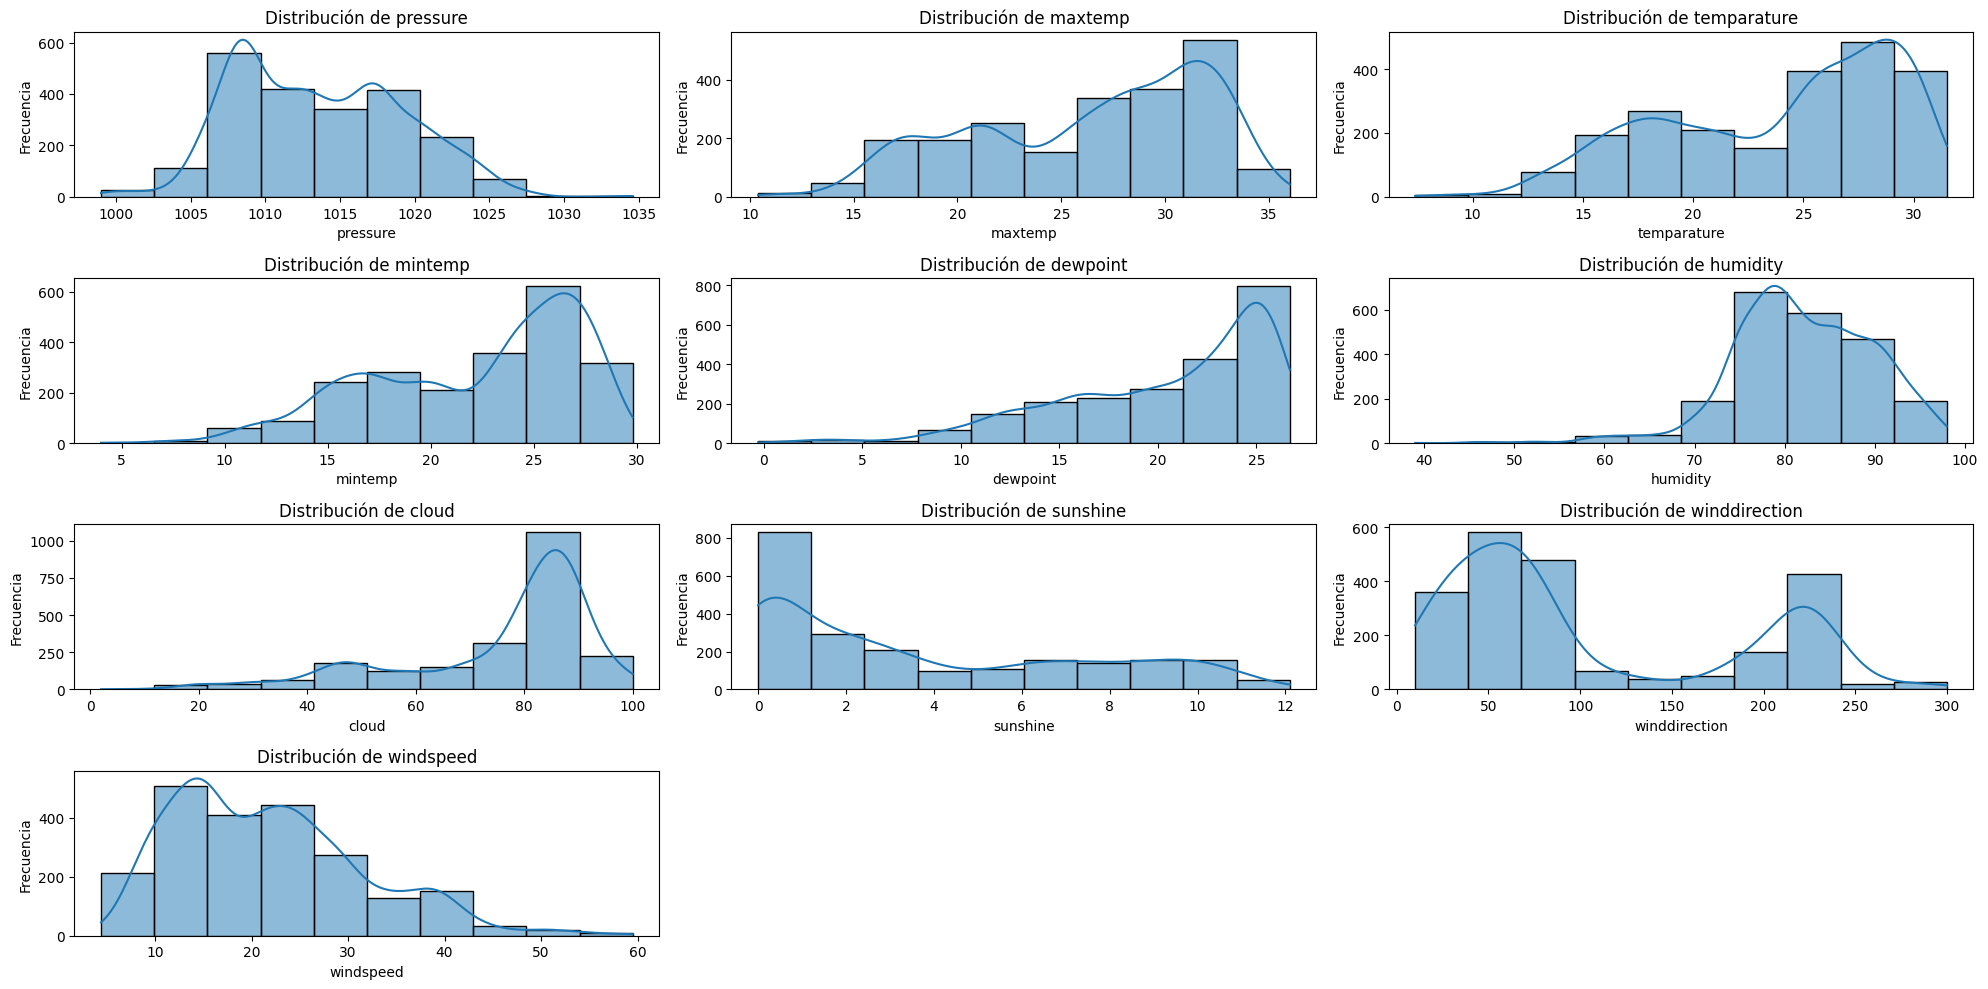

In [8]:
float_columns = train.select_dtypes(include=["float64"]).columns
plt.figure(figsize=(20, 10))

#Iteración sobre las columnas numéricas y generación de histograma para cada una
for index, column in enumerate(float_columns):
    plt.subplot(4,3, index+1)
    sns.histplot(train[column], kde=True, bins=10, palette="bright")
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

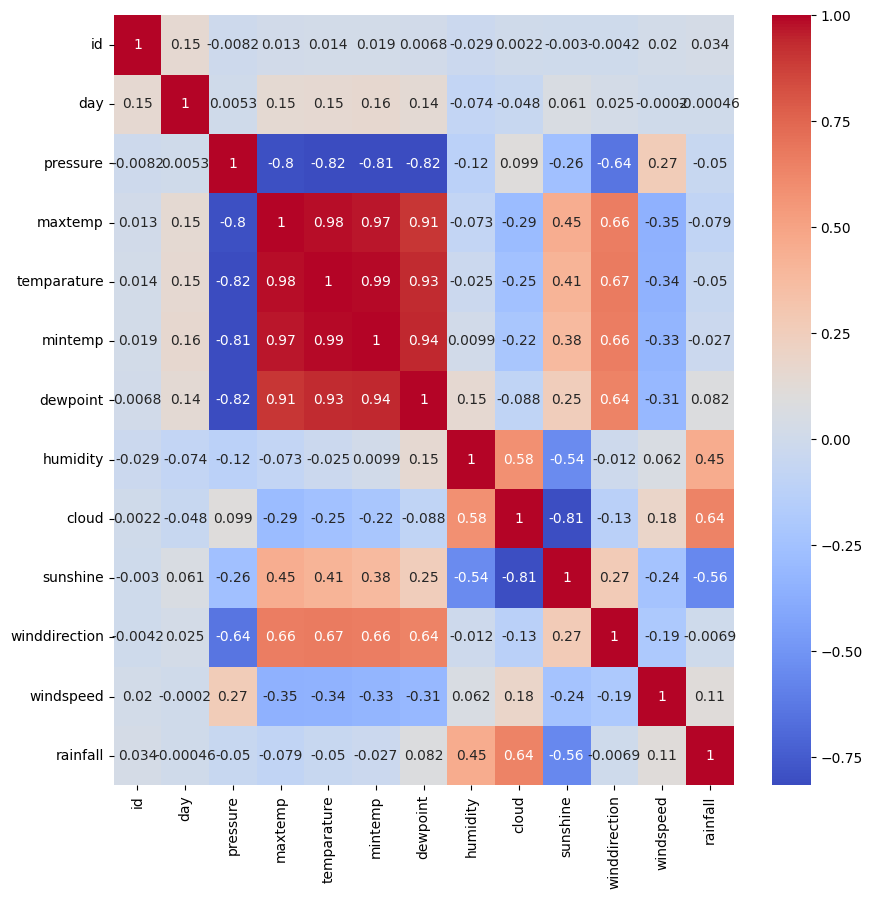

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
filas_con_nan = test[test.isna().any(axis=1)]
print(filas_con_nan)

       id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
517  2707  153    1007.8     32.9         30.6     28.9      22.0      65.0   

     cloud  sunshine  winddirection  windspeed  
517   75.0       8.2            NaN       17.2  


In [10]:
test['winddirection'] = test['winddirection'].fillna(test['winddirection'].mode()[0])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, r2_score, mean_absolute_error

In [12]:
classification_model = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB()
}

In [15]:
x = train.drop(columns=['rainfall'])
y = train['rainfall']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Best_acc = 0
Best_model = None
results = {}

for model_name, model in classification_model.items():

  model.fit(x_train,y_train)

  y_pred = model.predict(x_test)

  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
  recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
  results[model_name] = acc

  if acc > Best_acc:
    Best_acc = acc
    Best_model = model_name

  print(f'Modelo: {model_name}, Accuracy: {acc}, Precision: {precision}, Recall: {recall}')
print("\nBest Model:", Best_model)
print("Best Model Accuracy:", Best_acc)

# Imprimir resultados en formato tabla
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print(results_df)
print("\nResultados Detallados:")
print("Best Model Accuracy:", Best_acc)

Modelo: RandomForest, Accuracy: 0.8447488584474886, Precision: 0.8680351906158358, Recall: 0.9278996865203761
Modelo: GradientBoosting, Accuracy: 0.8493150684931506, Precision: 0.8645533141210374, Recall: 0.9404388714733543
Modelo: SVC, Accuracy: 0.728310502283105, Precision: 0.728310502283105, Recall: 1.0
Modelo: KNeighbors, Accuracy: 0.7876712328767124, Precision: 0.8021390374331551, Recall: 0.9404388714733543
Modelo: GaussianNB, Accuracy: 0.8333333333333334, Precision: 0.8867924528301887, Recall: 0.8840125391849529

Best Model: GradientBoosting
Best Model Accuracy: 0.8493150684931506
                  Accuracy
RandomForest      0.844749
GradientBoosting  0.849315
SVC               0.728311
KNeighbors        0.787671
GaussianNB        0.833333

Resultados Detallados:
Best Model Accuracy: 0.8493150684931506
